In [1030]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1031]:
bad_rows = {}
def bad_line_handler(cols=3):
    def handler(fields):
        if len(fields) == cols:
            return fields
        else:
            new_fields = fields[:cols-1] + [','.join(fields[cols-1:])]
            return new_fields
    return handler
   

auto_times = pd.read_csv('results/automatark-times.csv', header=1, index_col=False)
match_times = pd.read_csv('results/matching-times.csv', header=1, index_col=False)
rna_sat_times = pd.read_csv('results/rna-sat-times.csv', header=1, index_col=False)
rna_unsat_times = pd.read_csv('results/rna-unsat-times.csv', header=1, index_col=False)
woorpje_times = pd.read_csv('results/woorpje-times.csv', header=1, index_col=False)

a-str_auto = pd.read_csv('results/a-str/a-str-automatark-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,;]')
a-str_match = pd.read_csv('results/a-str/a-str-matching-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,;]')
a-str_rna_sat = pd.read_csv('results/a-str/a-str-rna-sat-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,;]')
a-str_rna_unsat = pd.read_csv('results/a-str/a-str-rna-unsat-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,;]')
a-str_woorpje = pd.read_csv('results/a-str/a-str-woorpje-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,;]')

cvc5_auto = pd.read_csv('results/cvc5/cvc5-automatark-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,;]')
cvc5_match = pd.read_csv('results/cvc5/cvc5-matching-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,;]')
cvc5_rna_sat = pd.read_csv('results/cvc5/cvc5-rna-sat-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,:]')
cvc5_rna_unsat = pd.read_csv('results/cvc5/cvc5-rna-unsat-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,:]')
cvc5_woorpje = pd.read_csv('results/cvc5/cvc5-woorpje-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,:]')

ostrich_auto = pd.read_csv('results/ostrich/ostrich-automatark-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,;]+')
ostrich_match = pd.read_csv('results/ostrich/ostrich-matching-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,:]+')
ostrich_rna_sat = pd.read_csv('results/ostrich/ostrich-rna-sat-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,:]+')
ostrich_rna_unsat = pd.read_csv('results/ostrich/ostrich-rna-unsat-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,:]+')
ostrich_woorpje = pd.read_csv('results/ostrich/ostrich-woorpje-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,:]+')

z3_auto = pd.read_csv('results/z3-noodler/z3-noodler-automatark-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,;]+')
z3_match = pd.read_csv('results/z3-noodler/z3-noodler-matching-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,;]+')
z3_rna_sat = pd.read_csv('results/z3-noodler/z3-noodler-rna-sat-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,:]+')
z3_rna_unsat = pd.read_csv('results/z3-noodler/z3-noodler-rna-unsat-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,:]+')
z3_woorpje = pd.read_csv('results/z3-noodler/z3-noodler-woorpje-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,:]+')

In [1032]:
automatarks = [
    a-str_auto.rename(columns={'result': 'result_a-str', 'model': 'model_a-str'}),
    cvc5_auto.rename(columns={'result': 'result_cvc5', 'model': 'model_cvc5'}),
    ostrich_auto.rename(columns={'result': 'result_ostrich', 'model': 'model_ostrich'}),
    z3_auto.rename(columns={'result': 'result_z3', 'model': 'model_z3'})
]
matchings = [
    a-str_match.rename(columns={'result': 'result_a-str', 'model': 'model_a-str'}),
    cvc5_match.rename(columns={'result': 'result_cvc5', 'model': 'model_cvc5'}),
    ostrich_match.rename(columns={'result': 'result_ostrich', 'model': 'model_ostrich'}),
    z3_match.rename(columns={'result': 'result_z3', 'model': 'model_z3'})
]
rna_sats = [
    a-str_rna_sat.rename(columns={'result': 'result_a-str', 'model': 'model_a-str'}),
    cvc5_rna_sat.rename(columns={'result': 'result_cvc5', 'model': 'model_cvc5'}),
    ostrich_rna_sat.rename(columns={'result': 'result_ostrich', 'model': 'model_ostrich'}),
    z3_rna_sat.rename(columns={'result': 'result_z3', 'model': 'model_z3'})
]
rna_unsats = [
    a-str_rna_unsat.rename(columns={'result': 'result_a-str', 'model': 'model_a-str'}),
    cvc5_rna_unsat.rename(columns={'result': 'result_cvc5', 'model': 'model_cvc5'}),
    ostrich_rna_unsat.rename(columns={'result': 'result_ostrich', 'model': 'model_ostrich'}),
    z3_rna_unsat.rename(columns={'result': 'result_z3', 'model': 'model_z3'})
]
woorpjes = [
    a-str_woorpje.rename(columns={'result': 'result_a-str', 'model': 'model_a-str'}),
    cvc5_woorpje.rename(columns={'result': 'result_cvc5', 'model': 'model_cvc5'}),
    ostrich_woorpje.rename(columns={'result': 'result_ostrich', 'model': 'model_ostrich'}),
    z3_woorpje.rename(columns={'result': 'result_z3', 'model': 'model_z3'})
]

def merge_all(dfs):
    from functools import reduce
    return reduce(lambda left, right: pd.merge(left, right, on='bench', how='outer'), dfs)

automatark = merge_all(automatarks)
matching = merge_all(matchings)
rna_sat = merge_all(rna_sats)
rna_unsat = merge_all(rna_unsats)
woorpje = merge_all(woorpjes)

automatark = automatark.applymap(lambda x: x.strip() if isinstance(x, str) else x)
matching = matching.applymap(lambda x: x.strip() if isinstance(x, str) else x)
rna_sat = rna_sat.applymap(lambda x: x.strip() if isinstance(x, str) else x)
rna_unsat = rna_unsat.applymap(lambda x: x.strip() if isinstance(x, str) else x)
woorpje = woorpje.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipykernel_1620783/2038942610.py:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  automatark = automatark.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/tmp/ipykernel_1620783/2038942610.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matching = matching.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/tmp/ipykernel_1620783/2038942610.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rna_sat = rna_sat.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/tmp/ipykernel_1620783/2038942610.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rna_unsat = rna_unsat.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/tmp/ipykernel_1620783/2038942610.py:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  woorpje = woorpje.applymap(lambda x: x.strip() if isins

In [1033]:
# def get_valid(df):
#     valid = df[
#         (df['result_a-str'] != 'timeout') &
#         (df['result_a-str'] == df['result_ostrich']) &
#         (df['result_a-str'] == df['result_z3'])
#     ]
#     valid_length = len(valid)
#     invalid_length = len(df) - valid_length
#     print(f"Valid: {valid_length}, Invalid: {invalid_length}")
#     return valid

In [1034]:
# autos = get_valid(automatark)
# autos.head()

In [1035]:
# match = get_valid(matching)
# match.head()

In [1036]:
# matching.head()

In [1037]:
# rna_s = get_valid(rna_sat)
# rna_s.head()

In [1038]:
# rna_u = get_valid(rna_unsat)
# rna_u.head()

In [1039]:
# rna_unsat.head()

In [1040]:
# woor = get_valid(woorpje)
# woor.head()

In [1041]:
def bad_a-str(df):
    bad = df[
        (df['result_a-str'] != 'timeout') &
        (df['result_a-str'] != df['result_z3'])
    ]
    return bad

In [1042]:
bad_auto = bad_a-str(automatark)
print(len(bad_auto)," bad automatarks")
bad_match = bad_a-str(matching)
print(len(bad_match), " bad matchings")
bad_rna_s = bad_a-str(rna_sat)
print(len(bad_rna_s), " bad rna_sats")
bad_rna_u = bad_a-str(rna_unsat)
print(len(bad_rna_u), " bad rna_unsats")
bad_woor = bad_a-str(woorpje)
print(len(bad_woor) ," bad woorpjes")

1  bad automatarks
0  bad matchings
0  bad rna_sats
1  bad rna_unsats
0  bad woorpjes


In [1043]:
# auto_times.head()

In [1044]:
automatark_times = auto_times[['filename','real','real.1','real.2','real.3']].rename(columns={'filename':'bench','real':'a-str_time','real.1':'cvc5_time','real.2':'ostrich_time','real.3':'z3_time'})
automatark_times['bench']=automatark_times['bench'].astype(str) + '.smt2'
# automatark_times.head()

In [1045]:
auto_all = pd.merge(automatark_times, automatark,how="inner", on='bench')
# auto_all.head()

In [1046]:
matching_times = match_times[['filename','real','real.1','real.2','real.3']].rename(columns={'filename':'bench','real':'a-str_time','real.1':'cvc5_time','real.2':'ostrich_time','real.3':'z3_time'})
matching_times['bench']=matching_times['bench'].astype(str) + '.smt2'
# matching_times.head()
match_all = pd.merge(matching_times, matching, how='inner', on='bench')
# match_all.head()

In [1047]:
rna_sat_times = rna_sat_times[['filename','real','real.1','real.2','real.3']].rename(columns={'filename':'bench','real':'a-str_time','real.1':'cvc5_time','real.2':'ostrich_time','real.3':'z3_time'})
rna_sat_times['bench']=rna_sat_times['bench'].astype(str) + '.smt2'
# rna_sat_times.head()

In [1048]:
rna_all = pd.merge(rna_sat_times, rna_sat, how="inner", on="bench")
# rna_all.head()

In [1049]:
rna_unsat_times = rna_unsat_times[['filename', 'real','real.1','real.2', 'real.3']].rename(columns={'filename':'bench','real':'a-str_time','real.1':'cvc5_time','real.2':'ostrich_time','real.3':'z3_time'})
rna_unsat_times['bench'] = rna_unsat_times['bench'].astype(str) + '.smt2'
# rna_unsat_times.head()
rna_unsat_all = pd.merge(rna_unsat_times, rna_unsat, how="inner", on="bench")

In [1050]:
woorpje_times = woorpje_times[['filename','real','real.1','real.2','real.3']].rename(columns={'filename':'bench','real':'a-str_time','real.1':'cvc5_time','real.2':'ostrich_time','real.3':'z3_time'})
woorpje_times['bench']=woorpje_times['bench'].astype(str) + '.smt2'
woorpje_all = pd.merge(woorpje_times, woorpje, how='inner', on='bench')
# woorpje_all.head()

In [1051]:
def a-str_correct(df):
    # consider a-str correct if it's timeout or matches either ostrich or z3
    ret = (
        (df['result_a-str'] == 'timeout') |
        (df['result_a-str'] == df['result_ostrich']) |
        (df['result_a-str'] == df['result_z3'])
    )
    return df[ret]

In [1052]:
a = a-str_correct(auto_all)
m = a-str_correct(match_all)
r = a-str_correct(rna_all)
ru = a-str_correct(rna_unsat_all)
w = a-str_correct(woorpje_all)
all = pd.concat([a,m,r,ru,w])

In [1094]:
m

,bench,a-str_time,cvc5_time,ostrich_time,z3_time,result_a-str,model_a-str,result_cvc5,model_cvc5,result_ostrich,model_ostrich,result_z3,model_z3
0,sub-matching-sat-13.smt2,9.07,9.13,NaN,15.79,sat,"28: ""44444444444444444444444444444444444444444...",sat,"( (define-fun a1 () String ""444444444444444444...",timeout,NaN,sat,"( (define-fun a16 () String ""44444444444..."
1,sub-matching-sat-20.smt2,4.19,4.03,NaN,7.79,sat,"42: ""PPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP...",sat,"( (define-fun a1 () String ""PPPPPPPPPPPPPPPPPP...",timeout,NaN,sat,"( (define-fun a16 () String ""PPPPPPPPPPP..."
2,sub-matching-sat-15.smt2,11.18,13.01,NaN,21.12,sat,"32: ""BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB...",sat,"( (define-fun a1 () String ""BBBBBBBBBBBBBBBBBB...",timeout,NaN,sat,"( (define-fun a16 () String ""BBBBBBBBBBB..."
3,sub-matching-unsat-15.smt2,5.30,5.05,NaN,10.39,unsat,NaN,unsat,"(error ""cannot get model unless after a SAT or...",timeout,NaN,unsat,"(error ""line 75 column 10: model is not availa..."
4,sub-matching-sat-4.smt2,7.30,10.60,NaN,16.75,sat,"10: ""EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...",sat,"( (define-fun a1 () String ""EEEEEEEEEEEEEEEEEE...",timeout,NaN,sat,"( (define-fun a7 () String ""EEEEEEEEEEEE..."
5,sub-matching-unsat-5.smt2,5.23,4.64,NaN,8.68,unsat,NaN,unsat,"(error ""cannot get model unless after a SAT or...",timeout,NaN,unsat,"(error ""line 35 column 10: model is not availa..."
6,sub-matching-sat-25.smt2,17.29,17.73,NaN,24.99,sat,"4: ""wwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww...",sat,"( (define-fun a () String ""wwwwwwwwwwwwwwwwwww...",timeout,NaN,sat,"( (define-fun a () String ""wwwwwwwwwwwww..."
7,sub-matching-sat-6.smt2,9.02,6.93,NaN,13.62,sat,"14: ""66666666666666666666666666666666666666666...",sat,"( (define-fun a1 () String ""666666666666666666...",timeout,NaN,sat,"( (define-fun a7 () String ""666666666666..."
8,sub-matching-sat-22.smt2,4.54,3.16,NaN,5.43,sat,"4: ""ffffffffffffffffffffffffffffffffffffffffff...",sat,"( (define-fun a () String ""fffffffffffffffffff...",timeout,NaN,sat,"( (define-fun a () String ""fffffffffffff..."
9,sub-matching-sat-17.smt2,17.90,18.15,NaN,25.87,sat,"36: ""HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...",sat,"( (define-fun a1 () String ""HHHHHHHHHHHHHHHHHH...",timeout,NaN,sat,"( (define-fun a16 () String ""HHHHHHHHHHH..."


In [1053]:
# a = pd.merge(automatark_times, automatark_new, how='inner', on='bench')
# m = pd.merge(matching_times, matching_new, how='inner', on='bench')
# r = pd.merge(rna_sat_times, rna_sat_new, how='inner', on='bench')
# ru = pd.merge(rna_unsat_times, rna_unsat_new, how='inner', on='bench')
# w = pd.merge(woorpje_times, woorpje_new, how='inner', on='bench')
# all_new = pd.concat([a,m,r,ru,w])
# all_new.head()

In [1054]:
len(all)

2342

In [1055]:
# newer_a-str_woorpje = pd.read_table('a-str-woorpje-pasted-logs.txr', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,;]')
# more_bad_woorpje = newer_a-str_woorpje.loc[newer_a-str_woorpje['result'].str.contains('Exception')]['bench']
# all_new = all_new[~all_new['bench'].isin(more_bad_woorpje)].reset_index(drop=True)
# len(all_new)

In [1056]:
all.isna().sum()

bench                0
a-str_time         1320
cvc5_time         1043
ostrich_time       109
z3_time             10
result_a-str          0
model_a-str        1368
result_cvc5          0
model_cvc5           0
result_ostrich       6
model_ostrich      754
result_z3            0
model_z3           637
dtype: int64

In [1057]:
all['result_cvc5'] = all['result_cvc5'].apply(
    lambda x: 'timeout' if isinstance(x, str) and 'SIGTERM' in x else x
)

In [1058]:
# z3_weird = all.loc[all['z3_time'].isna() & (all['result_z3'] != 'timeout')]
# print(len(z3_weird))
# a-str_weird = all.loc[all['a-str_time'].isna() & (all['result_a-str'] != 'timeout')]
# print(len(a-str_weird))
# cvc5_weird = all.loc[all['cvc5_time'].isna() & (all['result_cvc5'] != 'timeout')]
# print(len(cvc5_weird))
# ostrich_weird = all.loc[all['ostrich_time'].isna() & (all['result_ostrich'] != 'timeout')]
# print(len(ostrich_weird))

In [1059]:
# cvc5_weird.head()

In [1060]:
# z3_weird.head()

In [1061]:
# ostrich_weird.head()

In [1062]:
all.fillna({'a-str_time':120,'ostrich_time':120,'cvc5_time':120,'z3_time':120, 'result_z3':'timeout', 'result_a-str':'timeout', 'result_cvc5':'timeout', 'result_ostrich':'timeout'}, inplace=True)

In [1063]:
print("a-str total time =", sum(all['a-str_time']))
print("cvc5 total time = ", sum(all['cvc5_time']))
print("ostrich total time = ", sum(all['ostrich_time']))
print("z3-noodler total time = ", sum(all['z3_time']))

a-str total time = 160359.74
cvc5 total time =  125642.36
ostrich total time =  28093.53
z3-noodler total time =  2110.75


In [ ]:
a-str_results = all['result_a-str'].value_counts()
cvc5_results = all['result_cvc5'].value_counts()
ostrich_results = all['result_ostrich'].value_counts()
z3_results = all['result_z3'].value_counts()
print(a-str_results)
print(cvc5_results)
print(ostrich_results)
print(z3_results)

result_a-str
timeout    1320
sat         974
unsat        48
Name: count, dtype: int64
result_cvc5
sat        1138
timeout    1043
unsat       161
Name: count, dtype: int64
result_ostrich
sat        1588
unsat       645
timeout     109
Name: count, dtype: int64
result_z3
sat        1672
unsat       660
timeout      10
Name: count, dtype: int64


In [1065]:
# bad_woor = pd.merge(woorpje_times, bad_woor, how='inner', on='bench')
# bad_woor.loc[bad_woor['a-str_time'].idxmin()]

In [1066]:
all_times = all[['bench','a-str_time','cvc5_time','ostrich_time','z3_time']]
# all_times.head()
# len(all_times)

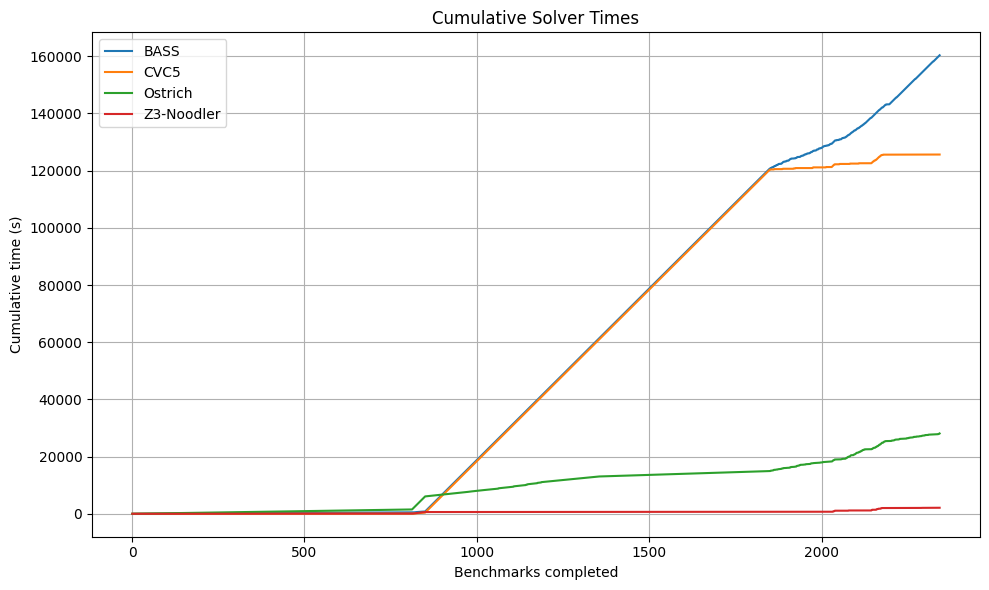

<Figure size 640x480 with 0 Axes>

In [1067]:
cum_a-str = all_times['a-str_time'].cumsum()
cum_cvc5 = all_times['cvc5_time'].cumsum()
cum_ostrich = all_times['ostrich_time'].cumsum()
cum_z3 = all_times['z3_time'].cumsum()

# X-axis: number of benchmarks completed
x = range(1, len(all_times) + 1)

plt.figure(figsize=(10,6))
plt.plot(x, cum_a-str, label='a-str')
plt.plot(x, cum_cvc5, label='CVC5')
plt.plot(x, cum_ostrich, label='Ostrich')
plt.plot(x, cum_z3, label='Z3-Noodler')
plt.xlabel('Benchmarks completed')
plt.ylabel('Cumulative time (s)')
plt.title('Cumulative Solver Times')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('plots/smt-pyplot.png', dpi=300)

In [1068]:
# all_times.iloc[900]

In [1069]:
# save all_time to csv
all_times.to_csv('results/all_times.csv', index=False)

In [1092]:
all.isna().sum()
all.fillna("", inplace=True)
len(all)

2342

In [1071]:
import re

def extract_quoted(text):
    return re.findall(r'"([^"]*)"', text)

a-str_models = all['model_a-str'].apply(extract_quoted)
cvc5_models = all['model_cvc5'].apply(extract_quoted)
ostrich_models = all['model_ostrich'].apply(extract_quoted)
z3_models = all['model_z3'].apply(extract_quoted)

In [1072]:

# z3_woorpje_models['max_len'] = z3_woorpje_models['z3_models'].apply(lambda xs: max(xs, key=len) if xs else None)
# z3_woorpje_models['max_len'] = z3_woorpje_models['z3_models'].apply(
#     lambda xs: len(max(xs, key=len)) if xs else 0
# )
# z3_woorpje_models.head()

In [1073]:
full_woorpje = pd.read_table('z3-noodler-woorpje-logs.txt', engine='python', names=['bench', 'result', 'model'], on_bad_lines=bad_line_handler(), sep=r'[,:]')
full_woorpje = full_woorpje.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# bad_woorpje_names = pd.read_table('bad-woorpje-filenames.txt', header=None, names=['bench'])
full_woorpje.fillna("", inplace=True)
full_woorpje['model'] = full_woorpje['model'].apply(extract_quoted)

full_woorpje['max_len'] = full_woorpje['model'].apply(lambda xs: max(xs, key=len) if xs else None)
full_woorpje['max_len'] = full_woorpje['model'].apply(
    lambda xs: len(max(xs, key=len)) if xs else 0
)
full_woorpje.loc[full_woorpje['result'] != 'sat', 'max_len'] = 0


/tmp/ipykernel_1620783/3615537489.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  full_woorpje = full_woorpje.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [1074]:
woorpje_concrete_string = pd.read_table('woorpje_conc.txt',header=None, names=['bench','conc-len'], sep=r'\s+')
# woorpje_concrete_string.head()

In [1075]:
woorpje_len_info = pd.merge(full_woorpje, woorpje_concrete_string, how='outer', on='bench')

In [1076]:
not_good_woorpje = woorpje_len_info.loc[woorpje_len_info['conc-len'] < woorpje_len_info['max_len'], :]

In [1077]:
# bad_woorpje_names['is_bad'] = True
# bad_woorpje_names.head()

In [1078]:
# pd.merge(not_good_woorpje, bad_woorpje_names, how='inner', on='bench')

In [1079]:
pd.merge(bad_woor, not_good_woorpje, how='inner', on='bench')

,bench,result_a-str,model_a-str,result_cvc5,model_cvc5,result_ostrich,model_ostrich,result_z3,model_z3,result,model,max_len,conc-len


In [1080]:
# a-str_woorpje.loc[a-str_woorpje['result'] == 'timeout']

In [1081]:
# full_woorpje

In [1082]:
# a-str_model = pd.concat([a-str_models.rename('model_a-str'), all['bench']] ,axis=1)

In [1083]:
# pd.merge(a-str_model, full_woorpje, how='inner', on='bench')

In [1084]:
# a-str_woorpje.head()

In [1085]:
# newer_a-str_woorpje = pd.read_table('a-str-woorpje-pasted-logs.txr', header=None, names=['bench', 'result', 'model'], engine='python', on_bad_lines=bad_line_handler(), sep=r'[,;]')
# newer_a-str_woorpje.head()

In [1086]:
# woorpje_compare = pd.merge(newer_a-str_woorpje.rename(columns={'model': 'model_new','result': 'result_new'}), a-str_woorpje, how='outer')

In [1087]:
# more_bad_woorpje = newer_a-str_woorpje.loc[newer_a-str_woorpje['result'].str.contains('Exception')]['bench']
# more_bad_woorpje.to_csv('more-bad-woorpje.txt', index=False, header=False)

In [1088]:
# bad_woor = bad_woor[~bad_woor['bench'].isin(more_bad_woorpje)].reset_index(drop=True)
# newer_a-str_woorpje = newer_a-str_woorpje.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [1089]:
# comp_w = pd.merge(newer_a-str_woorpje.rename(columns={'model': 'model_new', 'result': 'result_new'}), bad_woor, how='inner', on='bench')
# comp_w.loc[comp_w['result_new'] != comp_w['result_a-str']]

In [1090]:
bad_woor

,bench,result_a-str,model_a-str,result_cvc5,model_cvc5,result_ostrich,model_ostrich,result_z3,model_z3


In [1091]:
even_more = bad_woor['bench']
even_more.to_csv('even-more-bad-woorpje.txt', index=False, header=False)

In [1096]:
matching_times.head()

,bench,a-str_time,cvc5_time,ostrich_time,z3_time
0,sub-matching-unsat-12.smt2,1.87,17.54,NaN,25.34
1,sub-matching-sat-13.smt2,9.07,9.13,NaN,15.79
2,sub-matching-sat-20.smt2,4.19,4.03,NaN,7.79
3,sub-matching-sat-15.smt2,11.18,13.01,NaN,21.12
4,sub-matching-unsat-44.smt2,2.21,12.40,NaN,19.82


In [1098]:
m

,bench,a-str_time,cvc5_time,ostrich_time,z3_time,result_a-str,model_a-str,result_cvc5,model_cvc5,result_ostrich,model_ostrich,result_z3,model_z3
0,sub-matching-sat-13.smt2,9.07,9.13,NaN,15.79,sat,"28: ""44444444444444444444444444444444444444444...",sat,"( (define-fun a1 () String ""444444444444444444...",timeout,NaN,sat,"( (define-fun a16 () String ""44444444444..."
1,sub-matching-sat-20.smt2,4.19,4.03,NaN,7.79,sat,"42: ""PPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP...",sat,"( (define-fun a1 () String ""PPPPPPPPPPPPPPPPPP...",timeout,NaN,sat,"( (define-fun a16 () String ""PPPPPPPPPPP..."
2,sub-matching-sat-15.smt2,11.18,13.01,NaN,21.12,sat,"32: ""BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB...",sat,"( (define-fun a1 () String ""BBBBBBBBBBBBBBBBBB...",timeout,NaN,sat,"( (define-fun a16 () String ""BBBBBBBBBBB..."
3,sub-matching-unsat-15.smt2,5.30,5.05,NaN,10.39,unsat,NaN,unsat,"(error ""cannot get model unless after a SAT or...",timeout,NaN,unsat,"(error ""line 75 column 10: model is not availa..."
4,sub-matching-sat-4.smt2,7.30,10.60,NaN,16.75,sat,"10: ""EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...",sat,"( (define-fun a1 () String ""EEEEEEEEEEEEEEEEEE...",timeout,NaN,sat,"( (define-fun a7 () String ""EEEEEEEEEEEE..."
5,sub-matching-unsat-5.smt2,5.23,4.64,NaN,8.68,unsat,NaN,unsat,"(error ""cannot get model unless after a SAT or...",timeout,NaN,unsat,"(error ""line 35 column 10: model is not availa..."
6,sub-matching-sat-25.smt2,17.29,17.73,NaN,24.99,sat,"4: ""wwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww...",sat,"( (define-fun a () String ""wwwwwwwwwwwwwwwwwww...",timeout,NaN,sat,"( (define-fun a () String ""wwwwwwwwwwwww..."
7,sub-matching-sat-6.smt2,9.02,6.93,NaN,13.62,sat,"14: ""66666666666666666666666666666666666666666...",sat,"( (define-fun a1 () String ""666666666666666666...",timeout,NaN,sat,"( (define-fun a7 () String ""666666666666..."
8,sub-matching-sat-22.smt2,4.54,3.16,NaN,5.43,sat,"4: ""ffffffffffffffffffffffffffffffffffffffffff...",sat,"( (define-fun a () String ""fffffffffffffffffff...",timeout,NaN,sat,"( (define-fun a () String ""fffffffffffff..."
9,sub-matching-sat-17.smt2,17.90,18.15,NaN,25.87,sat,"36: ""HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...",sat,"( (define-fun a1 () String ""HHHHHHHHHHHHHHHHHH...",timeout,NaN,sat,"( (define-fun a16 () String ""HHHHHHHHHHH..."


In [1099]:
a-str_m = m['result_a-str'].value_counts()
cvc5_m = m['result_cvc5'].value_counts()
ostrich_m = m['result_ostrich'].value_counts()
z3_m = m['result_z3'].value_counts()
print(a-str_m)
print(cvc5_m)
print(ostrich_m)
print(z3_m)
print("a-str total time =", sum(m['a-str_time']))
print("cvc5 total time = ", sum(m['cvc5_time']))
print("ostrich total time = ", sum(m['ostrich_time']))
print("z3-noodler total time = ", sum(m['z3_time']))

result_a-str
sat      22
unsat    16
Name: count, dtype: int64
result_cvc5
sat      22
unsat    16
Name: count, dtype: int64
result_ostrich
timeout    38
Name: count, dtype: int64
result_z3
sat      22
unsat    16
Name: count, dtype: int64
a-str total time = 340.46999999999997
cvc5 total time =  394.99
ostrich total time =  nan
z3-noodler total time =  561.28


In [1100]:
len(auto_all)

813

In [1102]:
print("a-str_m_mem: ",sum(match_times['mem']))
print("cvc5_m_mem: ",sum(match_times['mem.1']))
print("ostrich_m_mem: ",sum(match_times['mem.2']))
print("z3_m_mem: ",sum(match_times['mem.3']))

a-str_m_mem:  62394668
cvc5_m_mem:  94810580
ostrich_m_mem:  nan
z3_m_mem:  2956652
